In [1]:
import os,sys
file_dir = os.getcwd()
sys.path.append(file_dir + "/hiivemdptoolbox")

import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import hiivemdptoolbox.hiive.mdptoolbox as mdptoolbox

In [3]:
title_fontsize = 24
fontsize = 24
legend_fontsize = 18
default_figure_size = (15, 8)

PROBLEM = "Forest"

In [4]:
SIZE = 10
R1=10
R2=20
FireProb=0.3
P, R = mdptoolbox.example.forest(S=SIZE, r1=R1, r2=R2, p=FireProb)
print(P)
print(R)

[[[0.3 0.7 0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.3 0.  0.7 0.  0.  0.  0.  0.  0.  0. ]
  [0.3 0.  0.  0.7 0.  0.  0.  0.  0.  0. ]
  [0.3 0.  0.  0.  0.7 0.  0.  0.  0.  0. ]
  [0.3 0.  0.  0.  0.  0.7 0.  0.  0.  0. ]
  [0.3 0.  0.  0.  0.  0.  0.7 0.  0.  0. ]
  [0.3 0.  0.  0.  0.  0.  0.  0.7 0.  0. ]
  [0.3 0.  0.  0.  0.  0.  0.  0.  0.7 0. ]
  [0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.7]
  [0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.7]]

 [[1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]]
[[ 0.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [10. 20.]]


In [5]:
def average_value_of_policy(P, R, policy, iterations=100):
    np.random.seed(0)
    rewards = []
    # print("policy: ", policy)
    for i in range(iterations):
        for starting_position in range(P.shape[-1]):
            # print("Starting Position {}".format(starting_position))
            position = starting_position
            reward = 0
            while starting_position == 0 or position != 0:
                # print("Action {}".format(policy[position]))
                trans_probs = P[policy[position]][position]
                prob = np.random.rand()
                for state, p in enumerate(trans_probs):
                    if prob <= p:
                        reward += R[position, policy[position]]
                        position = state
                        if starting_position == 0:
                            starting_position = state
                        # print("Next State {}".format(position))
                        break
                    else:
                        prob -= p
            rewards.append(reward)
    return np.mean(rewards)

In [8]:
import matplotlib.patches as mpatches

def plot_forest_problem_space(size=10):
    # https://stackoverflow.com/questions/43971138/python-plotting-colored-grid-based-on-values
    # create discrete colormap
    cmap = colors.ListedColormap(['lightgreen', 'lightblue'])
    
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
    wait = mpatches.Patch(color='lightgreen', label='Wait')
    cut = mpatches.Patch(color='lightblue', label='Cut')
    fig.legend(handles=[wait, cut], fontsize=20, loc='center right')
    fig.suptitle("Forest Problem Space", fontsize=18)
    plt.xlabel('State', fontsize=18)
    fig.set_figheight(4)
    fig.set_figwidth(9)

    wait = np.zeros((1,size))
    cut = np.ones((1,size))
    print(wait.astype(np.int32))
    print(cut.astype(np.int32))
    
    cmap = colors.ListedColormap(['lightgreen', 'lightblue'])
    ax1.imshow(cut.astype(np.int32), cmap=cmap)
    cmap = colors.ListedColormap(['lightblue', 'lightblue'])
    ax2.imshow(cut.astype(np.int32), cmap=cmap)
    
    text = ax1.text(0, -0.1, "0", horizontalalignment='center', verticalalignment='center', color="black")
    text = ax2.text(0, -0.1, "0", horizontalalignment='center', verticalalignment='center', color="black")
    for i in range(1,size-1):
        text = ax1.text(i, -0.1, "0", horizontalalignment='center', verticalalignment='center', color="black")
        text = ax2.text(i, -0.1, "1", horizontalalignment='center', verticalalignment='center', color="black")
    text = ax1.text(size-1, -0.1, str(R1), horizontalalignment='center', verticalalignment='center', color="black")
    text = ax2.text(size-1, -0.1, str(R2), horizontalalignment='center', verticalalignment='center', color="black")
    
    # draw gridlines
    for ax in [ax1, ax2]:
        ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
        ax.set_xticks(np.arange(-.5, size, 1));
        ax.set_xticklabels(np.arange(0, size+1, 1), fontsize=20)

        ax.set_yticks(np.arange(-.5, 1, 1));
        ax.axes.yaxis.set_ticks([])
    ax1.set_ylabel("Wait Action", fontsize=16, rotation=0, labelpad=80)
    ax2.set_ylabel("Cut Action", fontsize=16, rotation=0, labelpad=80)
    
    
def plot_forest_policy(ax, policy, y_label=""):
    # https://stackoverflow.com/questions/43971138/python-plotting-colored-grid-based-on-values
    # create discrete colormap
    cmap = colors.ListedColormap(['lightgreen', 'lightblue'])

    policy = np.array(policy)
    policy = policy.reshape(1, len(policy))

    ax.imshow(policy.astype(np.int32), cmap=cmap)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-.5, policy.shape[1], 1));
    ax.set_xticklabels(np.arange(0, policy.shape[1]+1, 1), fontsize=20)
            
    ax.set_yticks(np.arange(-.5, 1, 1));
    ax.axes.yaxis.set_ticks([])
    ax.set_ylabel(y_label, fontsize=16, rotation=0, labelpad=80)

def create_policy_figure(num_policies, title=""):
    fig, ax = plt.subplots(num_policies,1, sharex=True)
    wait = mpatches.Patch(color='lightgreen', label='Wait')
    cut = mpatches.Patch(color='lightblue', label='Cut')
    fig.legend(handles=[wait, cut], fontsize=20)
    fig.suptitle(title, fontsize=18)
    plt.xlabel('State', fontsize=18)
    fig.set_figheight(8)
    fig.set_figwidth(9)
    return fig, ax

DEMO = False
if DEMO:
    fig, ax = create_policy_figure(10, "Demo")
    for i in range(10):
        print(i)
        plot_forest_policy(ax[i], pi.policy, y_label="Gamma: X")

    plt.tight_layout()
    plt.show()

[[0 0 0 0 0 0 0 0 0 0]]
[[1 1 1 1 1 1 1 1 1 1]]


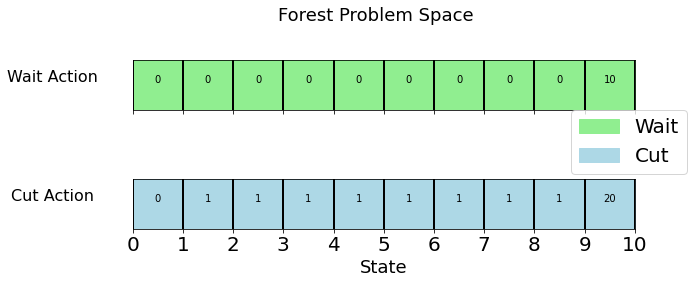

In [9]:
plot_forest_problem_space(10)

In [10]:
def gamma_parameter_tuning(P, R, agent_type='Policy Iteration'):
    run_stats = []
    title = "Change In Policy With Discount Factor\n{}".format(agent_type)
    gammas = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
    fig, ax = create_policy_figure(len(gammas), title)
    for gamma, ax in zip(gammas, ax):
        if agent_type == 'Policy Iteration':
            agent = mdptoolbox.mdp.PolicyIteration(P, R, gamma)
        elif agent_type == 'Value Iteration':
            agent = mdptoolbox.mdp.ValueIteration(P, R, gamma)
        agent.run()
        plot_forest_policy(ax, agent.policy, "Discount\nFactor: {:.2f}".format(gamma))

        df = pd.DataFrame(agent.run_stats)
        run_stats.append(df)
    
    plt.show()
    fig = plt.figure(figsize=default_figure_size)
    plt.title(title, fontsize=fontsize)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=fontsize)
    for df, gamma in zip(run_stats, gammas):
            plt.plot(df['Iteration'], df['Mean V'], label='Discount Factor: {:.2f}'.format(gamma))
    plt.xlabel("Iterations", fontsize=fontsize)
    plt.ylabel("Average Reward", fontsize=fontsize)
    plt.legend(fontsize=16)
    plt.grid()
    plt.show()


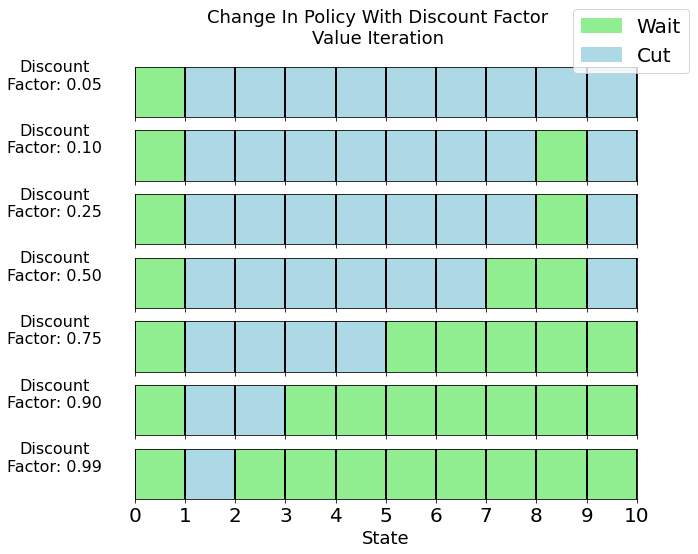

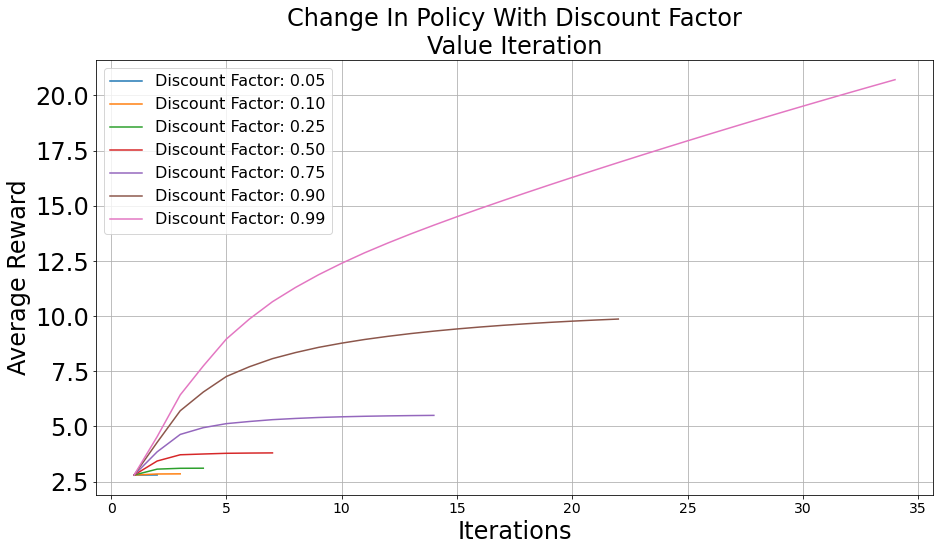

In [11]:
gamma_parameter_tuning(P, R, 'Value Iteration')

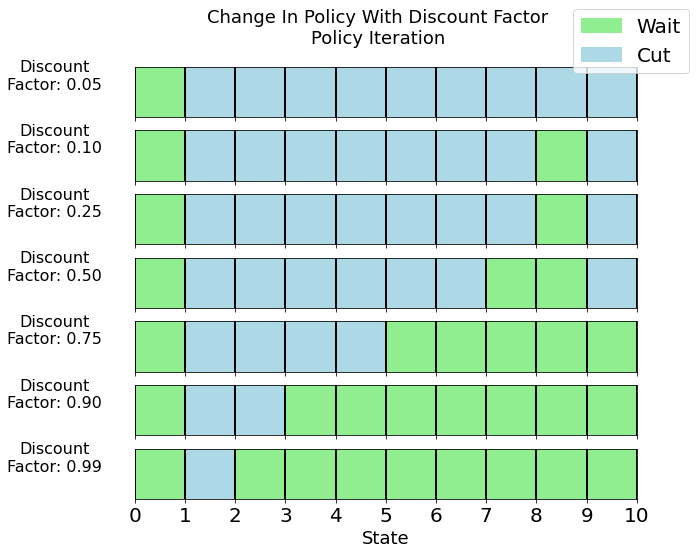

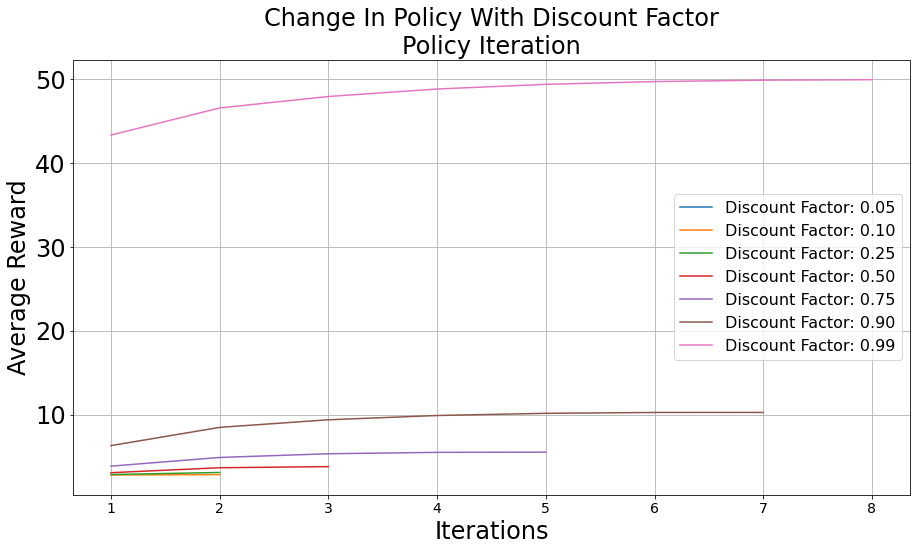

In [12]:
gamma_parameter_tuning(P, R, 'Policy Iteration')

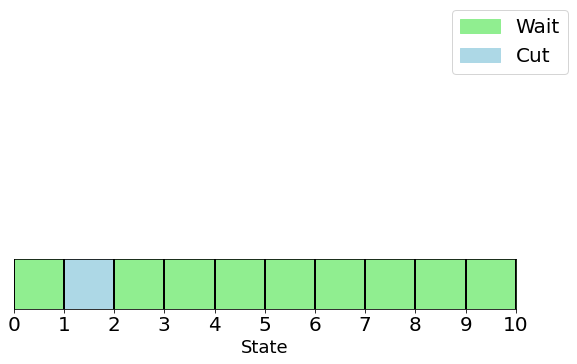

In [13]:
title=""
fig, ax = create_policy_figure(1, title)
agent = mdptoolbox.mdp.ValueIteration(P, R, 0.99)
agent.run()
plot_forest_policy(ax, agent.policy)

(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)


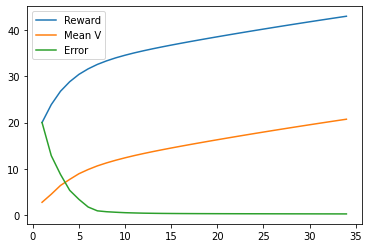

In [14]:
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.99)
vi.run()
print(vi.policy)

df = pd.DataFrame(vi.run_stats)
plt.plot(df['Iteration'], df['Reward'], label='Reward')
plt.plot(df['Iteration'], df['Mean V'], label='Mean V')
plt.plot(df['Iteration'], df['Error'], label="Error")

plt.legend()
plt.show()

(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)


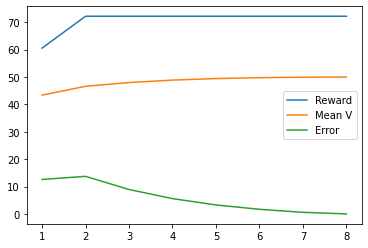

In [15]:
pi = mdptoolbox.mdp.PolicyIteration(P, R, 0.99)
pi.run()
print(pi.policy)

df = pd.DataFrame(pi.run_stats)

plt.plot(df['Iteration'], df['Reward'], label='Reward')
plt.plot(df['Iteration'], df['Mean V'], label='Mean V')
plt.plot(df['Iteration'], df['Error'], label="Error")
plt.legend()
plt.show()

In [16]:
def pi_vi_convergence_plot(P, R, gamma, agent_type='Policy Iteration', x_tick_spacing=2):
    title = "{} Convergence Plot for {} Probelm Size = {}\n Discount Factor = {}".format(agent_type, PROBLEM, SIZE, gamma)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=default_figure_size, sharex=True)
    fig.suptitle(title, fontsize=18)

    ax1.set_xlabel("Iterations", fontsize=16)
    ax2.set_xlabel("Iterations", fontsize=16)
    ax3.set_xlabel("Iterations", fontsize=16)
        
    plt.setp(ax1.get_yticklabels(), fontsize=16)
    plt.setp(ax2.get_yticklabels(), fontsize=16)
    plt.setp(ax3.get_yticklabels(), fontsize=16)
    
    plt.setp(ax1.get_xticklabels(), fontsize=16)
    plt.setp(ax2.get_xticklabels(), fontsize=16)
    plt.setp(ax3.get_xticklabels(), fontsize=16)
    
    if agent_type == 'Policy Iteration':
        agent = mdptoolbox.mdp.PolicyIteration(P, R, gamma)
    elif agent_type == 'Value Iteration':
        agent = mdptoolbox.mdp.ValueIteration(P, R, gamma)
    agent.run()

    df = pd.DataFrame(agent.run_stats)
    
    ax1.plot(df['Iteration'], df['Mean V'], label='Mean V', color="blue")
    ax2.plot(df['Iteration'], df['Error'], label="Error", color="orange")
    ax3.plot(df['Iteration'], df['Time'], label="Time", color="green")
    
    ax1.set_ylabel("Average Utility", fontsize=16)
    ax2.set_ylabel("Error", fontsize=16)
    ax3.set_ylabel("Time (s)", fontsize=16)
    
    ax1.set_xticks([i for i in range(0, max(df['Iteration'])+x_tick_spacing, x_tick_spacing)])
    ax2.set_xticks([i for i in range(0, max(df['Iteration'])+x_tick_spacing, x_tick_spacing)])
    ax3.set_xticks([i for i in range(0, max(df['Iteration'])+x_tick_spacing, x_tick_spacing)])
        
    ax1.grid()
    ax2.grid()
    ax3.grid()
    
    plt.tight_layout()
    plt.show()

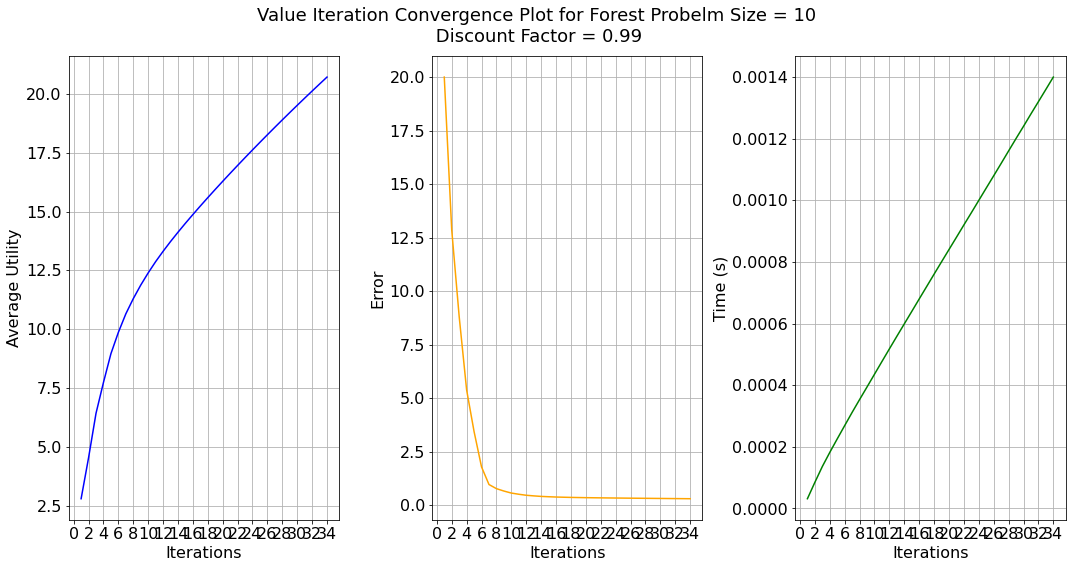

In [17]:
pi_vi_convergence_plot(P, R, 0.99, "Value Iteration")

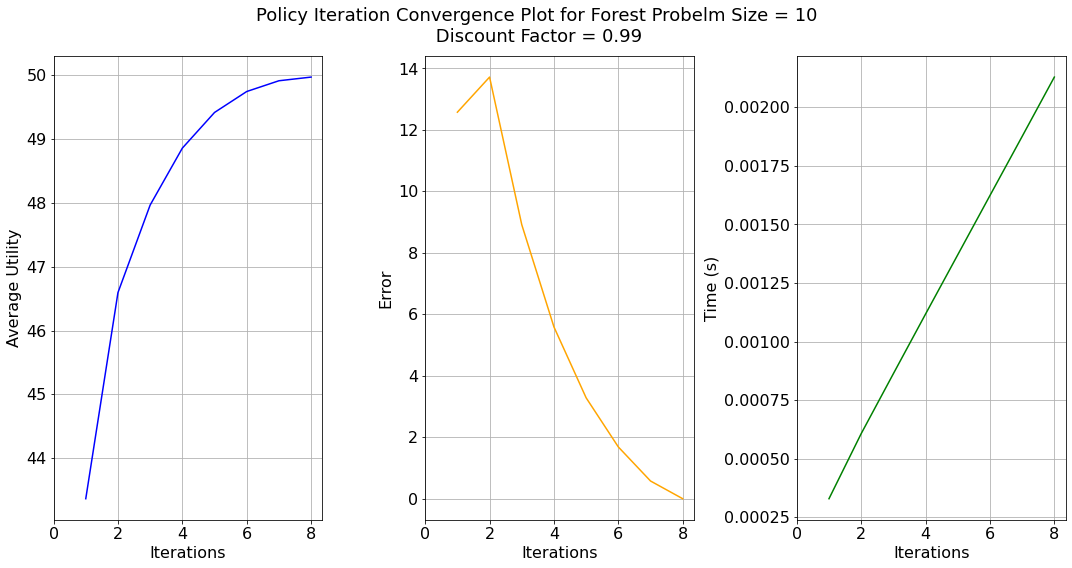

In [18]:
pi_vi_convergence_plot(P, R, 0.99, "Policy Iteration")

In [689]:
sizes = [10, 500, 5000]
q_iterations = {10: 500000, 500: 5000000, 5000: 20000000}
size_compare = []
for s in sizes:
    P_, R_ = mdptoolbox.example.forest(S=s, r1=R1, r2=R2, p=FireProb)
    vi_ = mdptoolbox.mdp.ValueIteration(P_, R_, 0.99)
    vi_.run()
    df = pd.DataFrame(vi_.run_stats)
    value = average_value_policy(P_, R_, vi_.policy)
    print("size = {} vi num_iterations = {} time = {} mean_value = {}".format(s, max(df['Iteration']), max(df['Time']), value))
    size_compare.append({"problem size": s, "algorithm": "Value Iteration", "time": max(df['Time']), "iterations" :max(df['Iteration']), 'value': value})
    pi_ = mdptoolbox.mdp.PolicyIteration(P_, R_, 0.99)
    pi_.run()
    df = pd.DataFrame(pi_.run_stats)
    value = average_value_policy(P_, R_, pi_.policy)
    print("size = {} pi num_iterations = {} time = {} mean_value = {}".format(s, max(df['Iteration']), max(df['Time']), value))
    print("Value Iteration policy equals Policy Iteration Policy ", np.all(vi_.policy == pi_.policy))
    size_compare.append({"problem size": s, "algorithm": "Policy Iteration", "time": max(df['Time']), "iterations" :max(df['Iteration']), "value": value})
    
    q = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                             alpha=0.75, alpha_decay=0.25, alpha_min=0.01,
                             epsilon=0.5, epsilon_min=0.01, epsilon_decay=0.9, n_iter=q_iterations[s])
    
    q_.run()
    df = pd.DataFrame(q_.run_stats)
    value = average_value_policy(P_, R_, q_.policy)
    print("size = {} q num_iterations = {} time = {} mean_value = {}".format(s, max(df['Iteration']), max(df['Time']), value))
    print("Q Learning Policy equals policy iteration ", np.all(q_.policy == pi_.policy))
    size_compare.append({"problem size": s, "algorithm": "Q Learning", "time": max(df['Time']), "iterations" :max(df['Iteration']), 'value': value})


size = 10 vi num_iterations = 19 time = 0.0013158321380615234 mean_value = 11.08
size = 10 pi num_iterations = 8 time = 0.0022313594818115234 mean_value = 11.08
Value Iteration policy equals Policy Iteration Policy  True
size = 10 q num_iterations = 20000000 time = 4324.569769144058 mean_value = 6.56
Q Learning Policy equals policy iteration  False
size = 500 vi num_iterations = 19 time = 0.003072500228881836 mean_value = 1.1976
size = 500 pi num_iterations = 8 time = 2.1766152381896973 mean_value = 1.1976
Value Iteration policy equals Policy Iteration Policy  True
size = 500 q num_iterations = 20000000 time = 4310.368242740631 mean_value = 0.48498
Q Learning Policy equals policy iteration  False
size = 5000 vi num_iterations = 19 time = 0.5334184169769287 mean_value = 1.02
size = 5000 pi num_iterations = 8 time = 16.869900465011597 mean_value = 1.02
Value Iteration policy equals Policy Iteration Policy  True
size = 5000 q num_iterations = 20000000 time = 4317.657127857208 mean_value =

In [690]:
def plot_problem_size(df):
    title = "{} Problem Size Comparison".format(PROBLEM)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=default_figure_size, sharex=True)
    fig.suptitle(title, fontsize=18)

    ax1.set_yscale('log')
    ax2.set_yscale('log')
    ax3.set_yscale('log')
    
    fontsize=16
    plt.setp(ax1.get_yticklabels(), fontsize=fontsize)
    plt.setp(ax2.get_yticklabels(), fontsize=fontsize)
    plt.setp(ax3.get_yticklabels(), fontsize=fontsize)
    
    plt.setp(ax1.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax2.get_xticklabels(), fontsize=fontsize)
    plt.setp(ax3.get_xticklabels(), fontsize=fontsize)
    
    sns.set_context("paper", rc={"font.size": fontsize, "axes.titlesize": fontsize, "axes.labelsize": fontsize})
    sns.barplot(x='problem size', y='iterations', hue='algorithm', data=df, ax=ax1)
    sns.barplot(x='problem size', y='time', hue='algorithm', data=df, ax=ax2)
    sns.barplot(x='problem size', y='value', hue='algorithm', data=df, ax=ax3)
    
    plt.tight_layout()
    plt.show()
    

<AxesSubplot:xlabel='problem size', ylabel='iterations'>

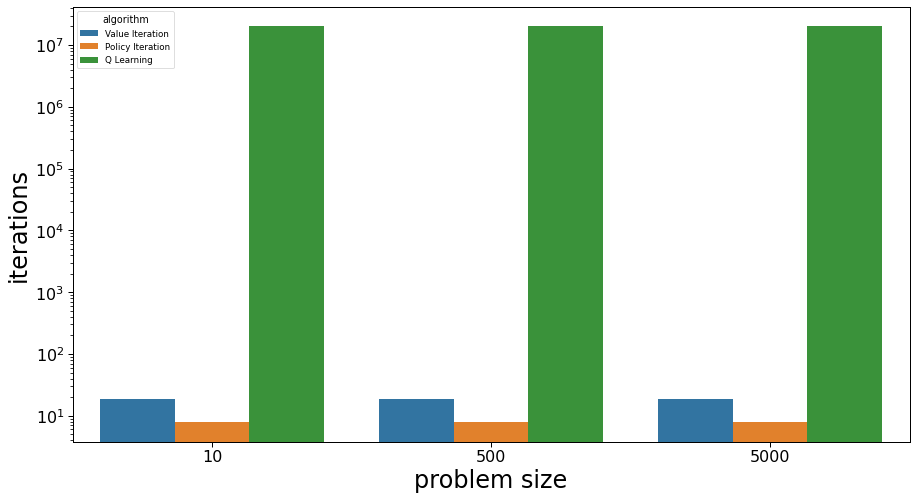

In [691]:
df = pd.DataFrame(size_compare)
fig, ax1 = plt.subplots(figsize=default_figure_size)
ax1.set_yscale('log')
plt.setp(ax1.get_xticklabels(), fontsize=16)
plt.setp(ax1.get_yticklabels(), fontsize=16)
sns.set_context("paper", rc={"font.size": fontsize, "axes.titlesize": fontsize, "axes.labelsize": fontsize})
sns.barplot(x='problem size', y='iterations', hue='algorithm', data=df, ax=ax1)

<AxesSubplot:xlabel='problem size', ylabel='time'>

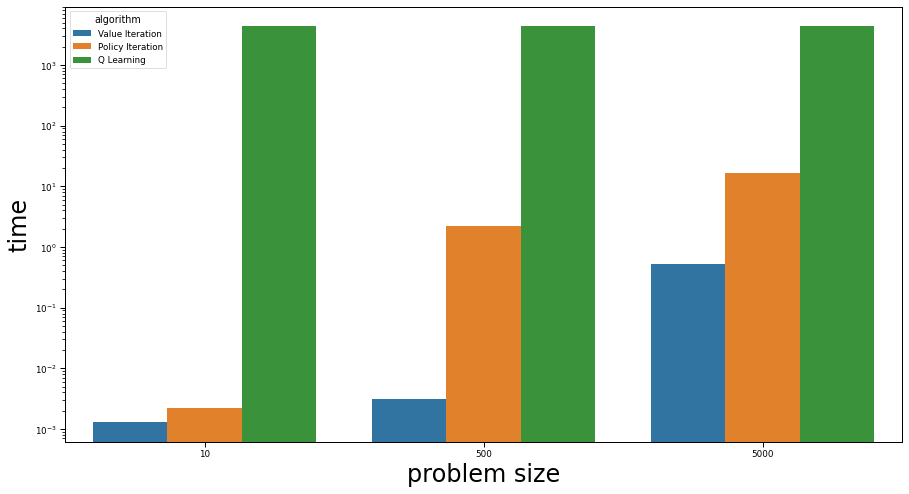

In [692]:
df = pd.DataFrame(size_compare)
fig, ax1 = plt.subplots(figsize=default_figure_size)
ax1.set_yscale('log')
sns.set_context("paper", rc={"font.size": fontsize, "axes.titlesize": fontsize, "axes.labelsize": fontsize})
sns.barplot(x='problem size', y='time', hue='algorithm', data=df, ax=ax1)

<AxesSubplot:xlabel='problem size', ylabel='value'>

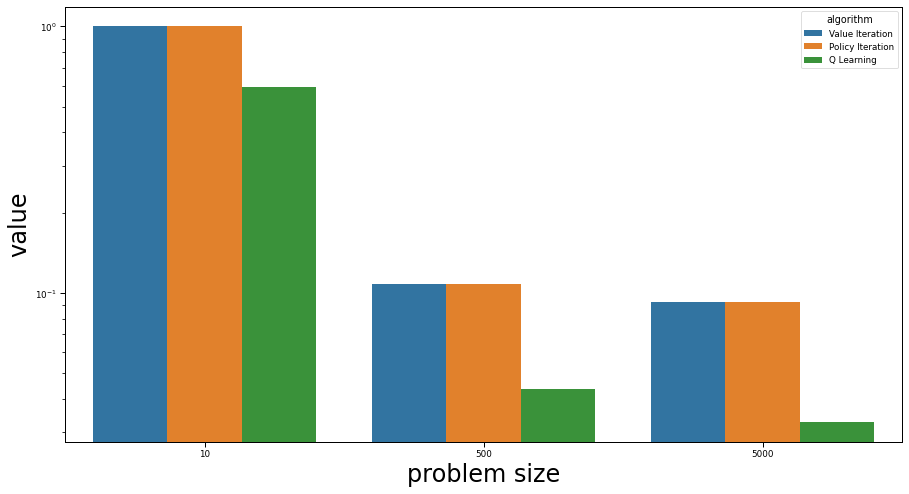

In [693]:
df = pd.DataFrame(size_compare)
df['value'] = df['value'] / max(df['value'])
fig, ax1 = plt.subplots(figsize=default_figure_size)
ax1.set_yscale('log')
sns.set_context("paper", rc={"font.size": fontsize, "axes.titlesize": fontsize, "axes.labelsize": fontsize})
sns.barplot(x='problem size', y='value', hue='algorithm', data=df, ax=ax1)

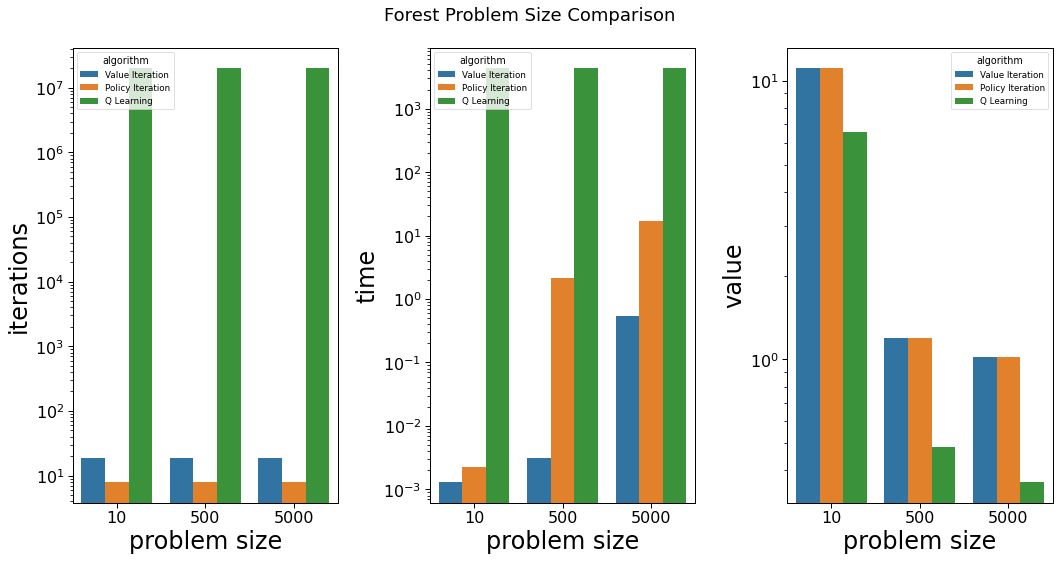

In [694]:
df = pd.DataFrame(size_compare)
plot_problem_size(df)

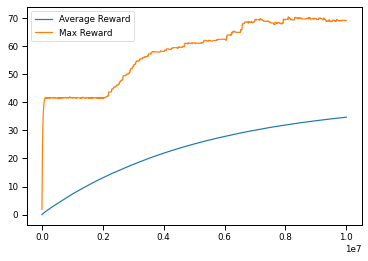

543.0991489887238


In [522]:
P, R = mdptoolbox.example.forest(S=500, r1=10, r2=20, p=0.3)

q = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                             alpha=0.4, alpha_decay=0.15, alpha_min=0.01,
                             epsilon=0.95, epsilon_min=0.05, epsilon_decay=0.6, n_iter=10000000)
q.run()
df = pd.DataFrame(q.run_stats)

plt.plot(df['Iteration'], df['Mean V'], label='Average Reward')
plt.plot(df['Iteration'], df['Max V'], label="Max Reward")
plt.legend()
plt.show()

print(np.max(df["Time"]))

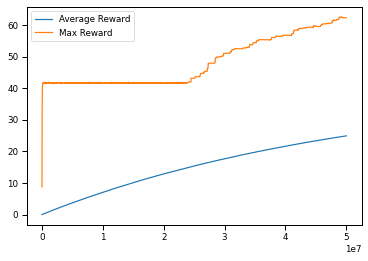

10796.727016448975


In [521]:
P, R = mdptoolbox.example.forest(S=5000, r1=10, r2=20, p=0.3)

q = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                             alpha=0.4, alpha_decay=0.15, alpha_min=0.01,
                             epsilon=0.95, epsilon_min=0.05, epsilon_decay=0.6, n_iter=50000000)
q.run()
df = pd.DataFrame(q.run_stats)

plt.plot(df['Iteration'], df['Mean V'], label='Average Reward')
plt.plot(df['Iteration'], df['Max V'], label="Max Reward")
plt.legend()
plt.show()

print(np.max(df["Time"]))

(0, 1, 0, 0, 0, 1, 0, 0, 0, 0)


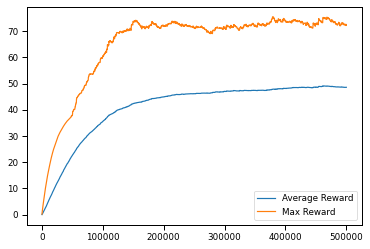

11


In [664]:
q = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                             alpha=0.4, alpha_decay=0.15, alpha_min=0.01,
                             epsilon=0.95, epsilon_min=0.05, epsilon_decay=0.6, n_iter=500000)
q.run()
print(q.policy)
df = pd.DataFrame(q.run_stats)

plt.plot(df['Iteration'], df['Mean V'], label='Average Reward')
plt.plot(df['Iteration'], df['Max V'], label="Max Reward")
plt.legend()
plt.show()

print(np.argmin(df['Error']))


# Q Learning Tuning

In [646]:
P, R = mdptoolbox.example.forest(S=SIZE, r1=R1, r2=R2, p=FireProb)

Running epsilon = 0.1
(0, 1, 1, 0, 1, 0, 0, 0, 0, 0)
Running epsilon = 0.2
(0, 1, 0, 0, 0, 0, 0, 0, 1, 0)
Running epsilon = 0.4
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
Running epsilon = 0.5
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
Running epsilon = 0.6
(0, 1, 0, 0, 1, 0, 0, 0, 0, 0)
Running epsilon = 0.7
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
Running epsilon = 0.9
(0, 1, 0, 1, 0, 0, 0, 0, 0, 0)
Running epsilon = 0.95
(0, 1, 0, 0, 0, 1, 0, 0, 0, 0)


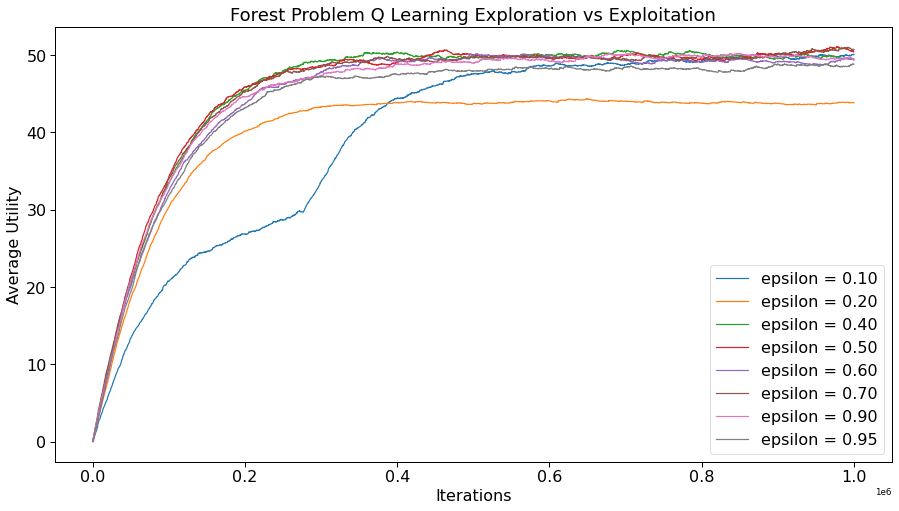

In [667]:
np.random.seed(0)
epsilon_list = [0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.9, 0.95]
epsilon_q_runstats = []
plt.figure(figsize=default_figure_size)
title = "{} Problem Q Learning Exploration vs Exploitation".format(PROBLEM)
plt.title(title, fontsize=18)
for epsilon in epsilon_list:
    print("Running epsilon = {}".format(epsilon))
    q = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                                 alpha=0.75, alpha_decay=0.25, alpha_min=0.01,
                                 epsilon=epsilon, epsilon_min=0.01, epsilon_decay=0.9, n_iter=1000000)

    q.run()
    epsilon_q_runstats.append(q.run_stats)
    print(q.policy)
    df = pd.DataFrame(q.run_stats)

    plt.plot(df['Iteration'], df['Mean V'], label='epsilon = {:.2f}'.format(epsilon))

plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Average Utility', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()


Running epsilon decay = 0.0
(0, 1, 0, 0, 0, 1, 0, 0, 0, 0)
Running epsilon decay = 0.1
(0, 1, 0, 1, 0, 0, 1, 0, 0, 0)
Running epsilon decay = 0.2
(0, 1, 0, 0, 1, 0, 0, 0, 0, 0)
Running epsilon decay = 0.30000000000000004
(0, 1, 0, 1, 0, 0, 0, 0, 0, 0)
Running epsilon decay = 0.4
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
Running epsilon decay = 0.5
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
Running epsilon decay = 0.6000000000000001
(0, 1, 0, 1, 0, 0, 0, 0, 1, 0)
Running epsilon decay = 0.7000000000000001
(0, 1, 1, 1, 0, 1, 0, 0, 0, 0)
Running epsilon decay = 0.8
(0, 1, 0, 1, 0, 1, 1, 0, 0, 0)
Running epsilon decay = 0.9
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)


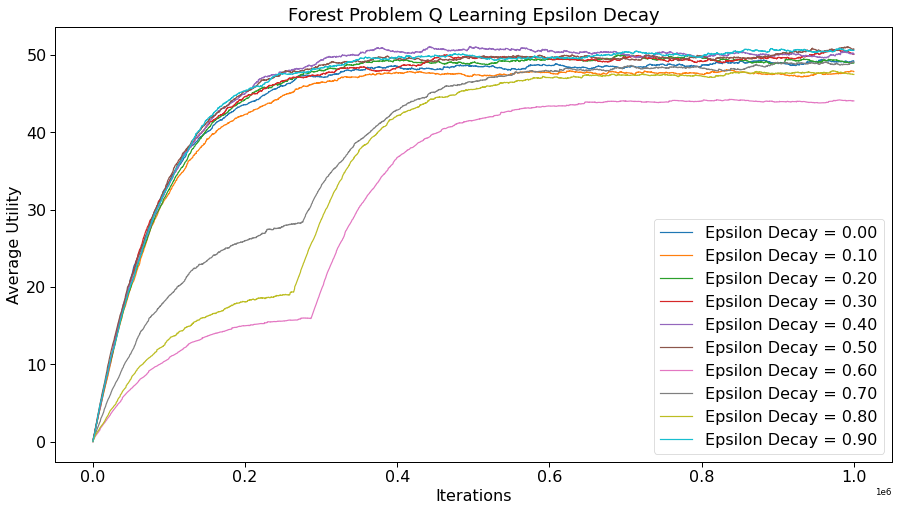

In [668]:
np.random.seed(0)
epsilon_decay_list = np.arange(0, 1, 0.1)
epsilon_decau_q_runstats = []
plt.figure(figsize=default_figure_size)
title = "{} Problem Q Learning Epsilon Decay".format(PROBLEM)
plt.title(title, fontsize=18)
for epsilon_decay in epsilon_decay_list:
    print("Running epsilon decay = {}".format(epsilon_decay))
    q = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                                 alpha=0.75, alpha_decay=0.25, alpha_min=0.01,
                                 epsilon=0.5, epsilon_min=0.01, epsilon_decay=epsilon_decay, n_iter=1000000)

    q.run()
    epsilon_decau_q_runstats.append(q.run_stats)
    print(q.policy)
    df = pd.DataFrame(q.run_stats)

    plt.plot(df['Iteration'], df['Mean V'], label='Epsilon Decay = {:.2f}'.format(epsilon_decay))

plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Average Utility', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.show()

Running alpha = 0.05
(0, 1, 0, 1, 1, 0, 0, 1, 0, 0)
33.322203397750854
Running alpha = 0.1
(0, 1, 0, 0, 0, 0, 0, 0, 1, 0)
33.460508823394775
Running alpha = 0.25
(0, 1, 1, 0, 0, 0, 0, 0, 0, 0)
33.5171685218811
Running alpha = 0.5
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
33.83923530578613
Running alpha = 0.75
(0, 1, 0, 0, 1, 0, 0, 0, 0, 0)
33.70746350288391
Running alpha = 0.9
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
33.71931743621826
Running alpha = 0.95
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
33.60402011871338


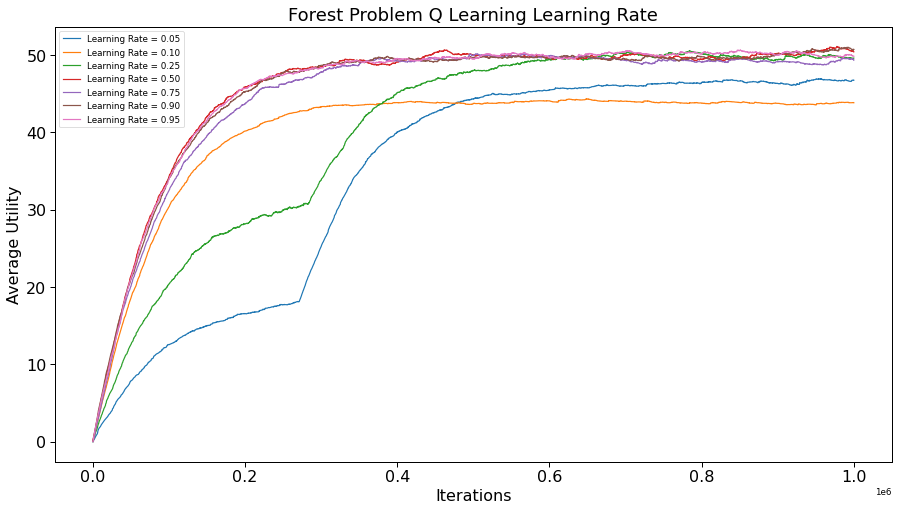

In [669]:
np.random.seed(0)
alpha_list = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]
alpha_q_run_stats = []
plt.figure(figsize=default_figure_size)
title = "{} Problem Q Learning Learning Rate".format(PROBLEM)
plt.title(title, fontsize=18)
for alpha in alpha_list:
    print("Running alpha = {}".format(alpha))
    q = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                                 alpha=alpha, alpha_decay=0.25, alpha_min=.01,
                                 epsilon=0.5, epsilon_min=0.01, epsilon_decay=0.9, n_iter=1000000)

    q.run()
    alpha_q_run_stats.append(q.run_stats)
    print(q.policy)
    df = pd.DataFrame(q.run_stats)

    plt.plot(df['Iteration'], df['Mean V'], label='Learning Rate = {:.2f}'.format(alpha))
    print(np.max(df["Time"]))

plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Average Utility', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.legend()
plt.show()

Running alpha decay = 0.01
(0, 1, 0, 1, 1, 0, 0, 1, 0, 0)
33.423755407333374
Running alpha decay = 0.05
(0, 1, 0, 0, 0, 0, 0, 0, 1, 0)
33.58807897567749
Running alpha decay = 0.1
(0, 1, 1, 0, 0, 0, 0, 0, 0, 0)
33.066766023635864
Running alpha decay = 0.25
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
33.22293758392334
Running alpha decay = 0.5
(0, 1, 0, 0, 1, 0, 0, 0, 0, 0)
33.07573628425598
Running alpha decay = 0.75
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
32.83624601364136
Running alpha decay = 0.9
(0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
33.188549280166626
Running alpha decay = 0.95
(0, 1, 1, 1, 0, 1, 0, 0, 0, 0)
32.295170545578
Running alpha decay = 0.99
(0, 1, 0, 1, 0, 0, 0, 0, 0, 0)
32.26923656463623


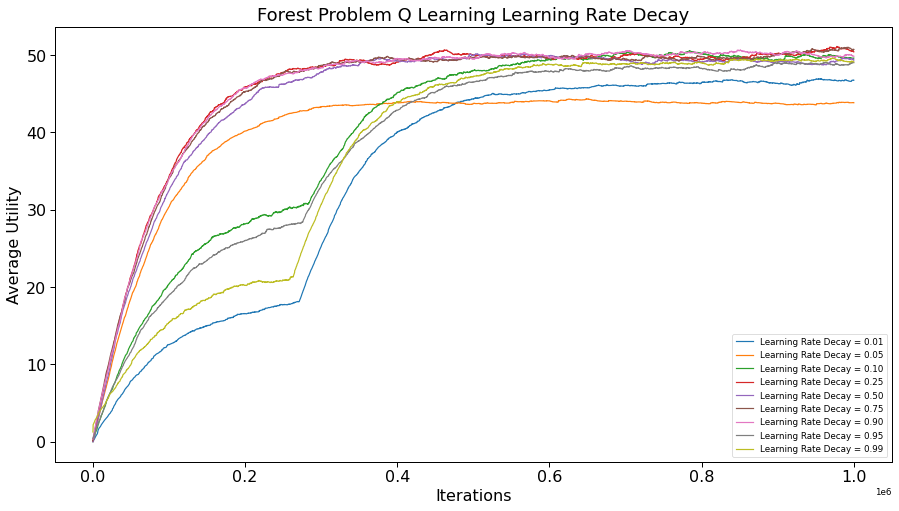

In [670]:
np.random.seed(0)
alpha_decay_list = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
alpha_decau_q_runstats = []
plt.figure(figsize=default_figure_size)
title = "{} Problem Q Learning Learning Rate Decay".format(PROBLEM)
plt.title(title, fontsize=18)
for alpha_decay in alpha_decay_list:
    print("Running alpha decay = {}".format(alpha_decay))
    q = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                                 alpha=0.75, alpha_decay=alpha_decay, alpha_min=0.01,
                                 epsilon=0.5, epsilon_min=0.01, epsilon_decay=0.9, n_iter=1000000)

    q.run()
    epsilon_decau_q_runstats.append(q.run_stats)
    print(q.policy)
    df = pd.DataFrame(q.run_stats)

    plt.plot(df['Iteration'], df['Mean V'], label='Learning Rate Decay = {:.2f}'.format(alpha_decay))
    print(np.max(df["Time"]))

plt.xlabel('Iterations', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('Average Utility', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.legend()
plt.show()

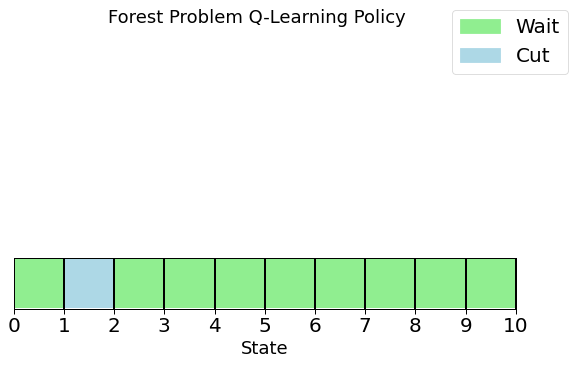

In [673]:
title="{} Problem Q-Learning Policy".format(PROBLEM)
fig, ax = create_policy_figure(1, title)
q = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                             alpha=0.75, alpha_decay=0.25, alpha_min=0.01,
                             epsilon=0.5, epsilon_min=0.01, epsilon_decay=0.9, n_iter=1000000)
q.run()
print(q.policy)
plot_forest_policy(ax, q.policy)

In [682]:
def explore_exploite_policy(P, R, agent_type='Q-Learning'):
    run_stats = []
    title = "Change In Policy Exploration Vs Exploitation\n{}".format(agent_type)
    epsilon_list = [0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.9, 0.95]
    
    fig, ax = create_policy_figure(len(epsilon_list), title)
    for epsilon, ax in zip(epsilon_list, ax):
        agent = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                                     alpha=0.75, alpha_decay=0.25, alpha_min=0.01,
                                     epsilon=epsilon, epsilon_min=0.01, epsilon_decay=1.0, n_iter=1000000)
        agent.run()
        plot_forest_policy(ax, agent.policy, "Epsilon: {:.2f}".format(epsilon))

        df = pd.DataFrame(agent.run_stats)
        run_stats.append(df)
    
    plt.show()
    fig = plt.figure(figsize=default_figure_size)
    plt.title(title, fontsize=fontsize)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=fontsize)
    for df, epsilon in zip(run_stats, epsilon_list):
            plt.plot(df['Iteration'], df['Mean V'], label='Epsilon: {:.2f}'.format(epsilon))
    plt.xlabel("Iterations", fontsize=fontsize)
    plt.ylabel("Average Reward", fontsize=fontsize)
    plt.legend(fontsize=16)
    plt.grid()
    plt.show()

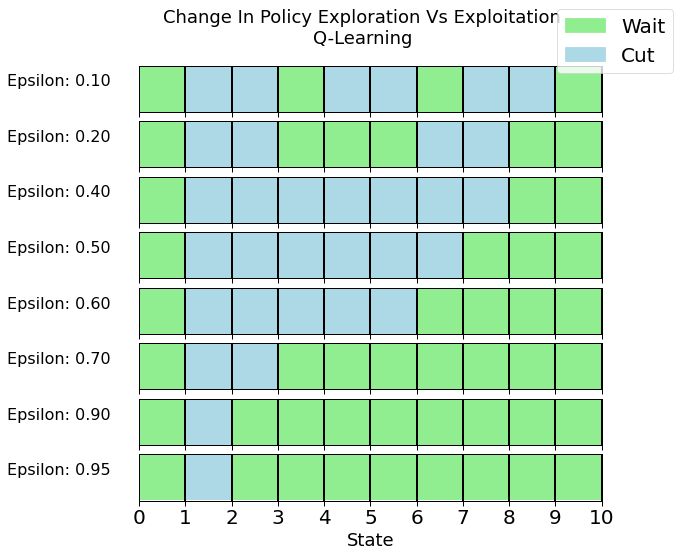

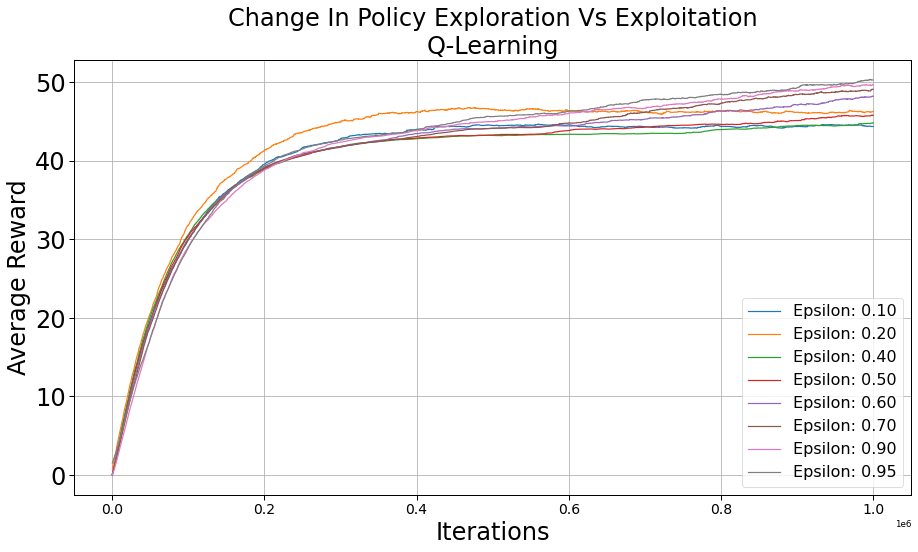

In [683]:
explore_exploite_policy(P, R)

In [687]:
def q_convergence_plot(P, R, agent_type='Q-Learning', x_tick_spacing=2):
    title = "{} Convergence Plot for {}".format(agent_type, PROBLEM)
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=default_figure_size, sharex=True)
    fig.suptitle(title, fontsize=18)

    ax1.set_xlabel("Iterations", fontsize=16)
    ax2.set_xlabel("Iterations", fontsize=16)
        
    plt.setp(ax1.get_yticklabels(), fontsize=16)
    plt.setp(ax2.get_yticklabels(), fontsize=16)
    
    plt.setp(ax1.get_xticklabels(), fontsize=16)
    plt.setp(ax2.get_xticklabels(), fontsize=16)
    
    agent = mdptoolbox.mdp.QLearning(P, R, gamma=0.99,
                                 alpha=0.75, alpha_decay=0.25, alpha_min=0.01,
                                 epsilon=epsilon, epsilon_min=0.01, epsilon_decay=1.0, n_iter=1000000)
    agent.run()

    df = pd.DataFrame(agent.run_stats)
    
    ax1.plot(df['Iteration'], df['Mean V'], label='Mean V', color="blue")
    ax2.plot(df['Iteration'], df['Time'], label="Time", color="green")
    
    ax1.set_ylabel("Average Utility", fontsize=16)
    ax2.set_ylabel("Time (s)", fontsize=16)
    
#     ax1.set_xticks([i for i in range(0, max(df['Iteration'])+x_tick_spacing, x_tick_spacing)])
#     ax2.set_xticks([i for i in range(0, max(df['Iteration'])+x_tick_spacing, x_tick_spacing)])
#     ax3.set_xticks([i for i in range(0, max(df['Iteration'])+x_tick_spacing, x_tick_spacing)])
        
    ax1.grid()
    ax2.grid()
    
    plt.tight_layout()
    plt.show()

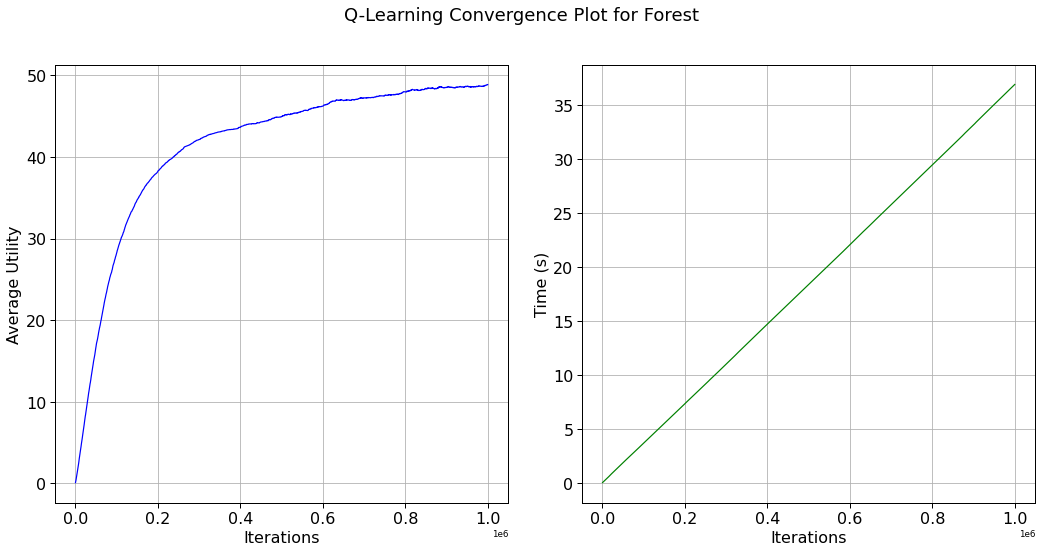

In [688]:
q_convergence_plot(P,R)